In [1]:
import pandas,numpy,seaborn

import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40,'font.family':'Arial','xtick.labelsize':20,'ytick.labelsize':20,'axes.labelsize':33})
matplotlib.rcParams['pdf.fonttype']=42

# 0. user defined variables

In [2]:
transcripts_data_file='/Volumes/omics4tb/alomana/projects/TLR/data/DESeq2/normalizedCounts.trna.csv'
footprints_data_file='/Volumes/omics4tb/alomana/projects/TLR/data/DESeq2/normalizedCounts.rbf.csv'

# 1. read data

In [3]:
dfa=pandas.read_csv(transcripts_data_file)
dfa.set_index('Unnamed: 0',inplace=True)
dfa.rename_axis('geneID',inplace=True)
print(dfa.shape)
dfa.head()

(2371, 12)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,trna.rep.3.tp.3,trna.rep.3.tp.4
geneID,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,20.030011,20.074433
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,14.419380,13.430681
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,13.079664,12.151285
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,13.743723,12.994782
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,11.414751,10.726692


In [4]:
dfb=pandas.read_csv(footprints_data_file)
dfb.set_index('Unnamed: 0',inplace=True)
dfb.rename_axis('geneID',inplace=True)
print(dfb.shape)
dfb.head()

(2331, 12)


,rbf.rep.1.tp.1,rbf.rep.1.tp.2,rbf.rep.1.tp.3,rbf.rep.1.tp.4,rbf.rep.2.tp.1,rbf.rep.2.tp.2,rbf.rep.2.tp.3,rbf.rep.2.tp.4,rbf.rep.3.tp.1,rbf.rep.3.tp.2,rbf.rep.3.tp.3,rbf.rep.3.tp.4
geneID,,,,,,,,,,,,
gene-VNG_RS00005,10.811266,10.920911,12.168485,13.794528,11.056294,11.394621,11.171158,13.867397,10.919963,10.521812,12.412850,12.757550
gene-VNG_RS00010,7.827787,9.107189,9.983565,9.693348,8.004309,9.118822,10.015582,9.237407,8.033598,8.987881,9.809939,9.094818
gene-VNG_RS00015,7.170129,8.436593,9.048484,8.407894,7.258566,8.411314,9.128567,8.269700,7.420174,8.739695,8.980261,8.503122
gene-VNG_RS00020,6.656778,7.962958,8.400121,8.716360,6.903285,7.800612,8.851039,8.515463,6.952641,8.089160,8.732132,8.489572
gene-VNG_RS00025,8.067147,8.503449,8.134142,7.732634,8.065655,8.540412,8.370340,7.786622,7.937986,8.606267,8.281861,7.598884


In [5]:
dfc=dfa.join(dfb,how='inner')
print(dfc.shape)
dfc.head()

(2331, 24)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,...,rbf.rep.1.tp.3,rbf.rep.1.tp.4,rbf.rep.2.tp.1,rbf.rep.2.tp.2,rbf.rep.2.tp.3,rbf.rep.2.tp.4,rbf.rep.3.tp.1,rbf.rep.3.tp.2,rbf.rep.3.tp.3,rbf.rep.3.tp.4
geneID,,,,,,,,,,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,...,12.168485,13.794528,11.056294,11.394621,11.171158,13.867397,10.919963,10.521812,12.412850,12.757550
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,...,9.983565,9.693348,8.004309,9.118822,10.015582,9.237407,8.033598,8.987881,9.809939,9.094818
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,...,9.048484,8.407894,7.258566,8.411314,9.128567,8.269700,7.420174,8.739695,8.980261,8.503122
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,...,8.400121,8.716360,6.903285,7.800612,8.851039,8.515463,6.952641,8.089160,8.732132,8.489572
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,...,8.134142,7.732634,8.065655,8.540412,8.370340,7.786622,7.937986,8.606267,8.281861,7.598884


# 2. manipulate data

In [6]:
dfc['transcript.tp1.average']=dfc.loc[:,['trna.rep.1.tp.1','trna.rep.2.tp.1','trna.rep.3.tp.1']].median(axis=1)
dfc['transcript.tp2.average']=dfc.loc[:,['trna.rep.1.tp.2','trna.rep.2.tp.2','trna.rep.3.tp.2']].median(axis=1)
dfc['transcript.tp3.average']=dfc.loc[:,['trna.rep.1.tp.3','trna.rep.2.tp.3','trna.rep.3.tp.3']].median(axis=1)
dfc['transcript.tp4.average']=dfc.loc[:,['trna.rep.1.tp.4','trna.rep.2.tp.4','trna.rep.3.tp.4']].median(axis=1)
#
dfc['footprints.tp1.average']=dfc.loc[:,['rbf.rep.1.tp.1','rbf.rep.2.tp.1','rbf.rep.3.tp.1']].median(axis=1)
dfc['footprints.tp2.average']=dfc.loc[:,['rbf.rep.1.tp.2','rbf.rep.2.tp.2','rbf.rep.3.tp.2']].median(axis=1)
dfc['footprints.tp3.average']=dfc.loc[:,['rbf.rep.1.tp.3','rbf.rep.2.tp.3','rbf.rep.3.tp.3']].median(axis=1)
dfc['footprints.tp4.average']=dfc.loc[:,['rbf.rep.1.tp.4','rbf.rep.2.tp.4','rbf.rep.3.tp.4']].median(axis=1)
#
print(dfc.shape)
dfc.head()

(2331, 32)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,...,rbf.rep.3.tp.3,rbf.rep.3.tp.4,transcript.tp1.average,transcript.tp2.average,transcript.tp3.average,transcript.tp4.average,footprints.tp1.average,footprints.tp2.average,footprints.tp3.average,footprints.tp4.average
geneID,,,,,,,,,,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,...,12.412850,12.757550,18.938371,19.270215,19.876300,20.364131,10.919963,10.920911,12.168485,13.794528
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,...,9.809939,9.094818,12.577726,13.538917,14.289469,13.752900,8.004309,9.107189,9.983565,9.237407
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,...,8.980261,8.503122,11.125430,12.089033,13.079664,12.573962,7.258566,8.436593,9.048484,8.407894
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,...,8.732132,8.489572,11.582232,12.700412,13.743723,13.358040,6.903285,7.962958,8.732132,8.515463
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,...,8.281861,7.598884,11.612381,11.847327,11.414751,11.007777,8.065655,8.540412,8.281861,7.732634


## 2.1. noise

In [7]:
mean=dfc.loc[:,['trna.rep.1.tp.1','trna.rep.2.tp.1','trna.rep.3.tp.1']].mean(axis=1)
std=dfc.loc[:,['trna.rep.1.tp.1','trna.rep.2.tp.1','trna.rep.3.tp.1']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['transcript.tp.1.rsem']=sem/mean

mean=dfc.loc[:,['trna.rep.1.tp.2','trna.rep.2.tp.2','trna.rep.3.tp.2']].mean(axis=1)
std=dfc.loc[:,['trna.rep.1.tp.2','trna.rep.2.tp.2','trna.rep.3.tp.2']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['transcript.tp.2.rsem']=sem/mean

mean=dfc.loc[:,['trna.rep.1.tp.3','trna.rep.2.tp.3','trna.rep.3.tp.3']].mean(axis=1)
std=dfc.loc[:,['trna.rep.1.tp.3','trna.rep.2.tp.3','trna.rep.3.tp.3']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['transcript.tp.3.rsem']=sem/mean

mean=dfc.loc[:,['trna.rep.1.tp.4','trna.rep.2.tp.4','trna.rep.3.tp.4']].mean(axis=1)
std=dfc.loc[:,['trna.rep.1.tp.4','trna.rep.2.tp.4','trna.rep.3.tp.4']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['transcript.tp.4.rsem']=sem/mean

###
###
###

mean=dfc.loc[:,['rbf.rep.1.tp.1','rbf.rep.2.tp.1','rbf.rep.3.tp.1']].mean(axis=1)
std=dfc.loc[:,['rbf.rep.1.tp.1','rbf.rep.2.tp.1','rbf.rep.3.tp.1']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['footprints.tp.1.rsem']=sem/mean

mean=dfc.loc[:,['rbf.rep.1.tp.2','rbf.rep.2.tp.2','rbf.rep.3.tp.2']].mean(axis=1)
std=dfc.loc[:,['rbf.rep.1.tp.2','rbf.rep.2.tp.2','rbf.rep.3.tp.2']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['footprints.tp.2.rsem']=sem/mean

mean=dfc.loc[:,['rbf.rep.1.tp.3','rbf.rep.2.tp.3','rbf.rep.3.tp.3']].mean(axis=1)
std=dfc.loc[:,['rbf.rep.1.tp.3','rbf.rep.2.tp.3','rbf.rep.3.tp.3']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['footprints.tp.3.rsem']=sem/mean

mean=dfc.loc[:,['rbf.rep.1.tp.4','rbf.rep.2.tp.4','rbf.rep.3.tp.4']].mean(axis=1)
std=dfc.loc[:,['rbf.rep.1.tp.4','rbf.rep.2.tp.4','rbf.rep.3.tp.4']].std(axis=1)
sem=std/numpy.sqrt(3)
dfc['footprints.tp.4.rsem']=sem/mean

#

print(dfc.shape)
dfc.head()

(2331, 40)


,trna.rep.1.tp.1,trna.rep.1.tp.2,trna.rep.1.tp.3,trna.rep.1.tp.4,trna.rep.2.tp.1,trna.rep.2.tp.2,trna.rep.2.tp.3,trna.rep.2.tp.4,trna.rep.3.tp.1,trna.rep.3.tp.2,...,footprints.tp3.average,footprints.tp4.average,transcript.tp.1.rsem,transcript.tp.2.rsem,transcript.tp.3.rsem,transcript.tp.4.rsem,footprints.tp.1.rsem,footprints.tp.2.rsem,footprints.tp.3.rsem,footprints.tp.4.rsem
geneID,,,,,,,,,,,,,,,,,,,,,
gene-VNG_RS00005,18.908091,19.348712,19.232525,20.380208,18.938371,19.091152,19.876300,20.364131,19.156748,19.270215,...,12.168485,13.794528,0.004122,0.003962,0.012392,0.004901,0.006486,0.023047,0.031867,0.026603
gene-VNG_RS00010,12.577726,13.632958,14.231019,13.946876,12.721514,13.538917,14.289469,13.752900,12.469030,13.376768,...,9.983565,9.237407,0.005808,0.005536,0.003889,0.010980,0.008080,0.004613,0.006429,0.019322
gene-VNG_RS00015,11.125430,12.431311,12.426860,12.711125,11.151036,12.021155,13.359287,12.573962,11.085732,12.089033,...,9.048484,8.407894,0.001708,0.010421,0.021324,0.013501,0.010051,0.012369,0.004734,0.008073
gene-VNG_RS00020,11.503600,13.007351,13.206630,13.518170,11.582232,12.670860,13.988871,13.358040,11.625355,12.700412,...,8.732132,8.515463,0.003080,0.008409,0.016927,0.011650,0.013384,0.010504,0.015579,0.008359
gene-VNG_RS00025,11.658570,11.967482,11.053223,11.007777,11.612381,11.674338,11.665724,11.088320,11.507828,11.847327,...,8.281861,7.732634,0.003846,0.007192,0.015624,0.010019,0.005335,0.003517,0.008339,0.007241


In [8]:
gene_names=dfc.index.to_list()
gene_names.sort()
print('number of elements:',len(gene_names))

setx=[]; sety=[]
hollowx=[]; hollowy=[]

for gene_name in gene_names:
        
    m=dfc.loc[gene_name,'transcript.tp1.average']
    r=dfc.loc[gene_name,'footprints.tp1.average']-dfc.loc[gene_name,'transcript.tp1.average']
    
    if (dfc.loc[gene_name,'transcript.tp.1.rsem'] < 1/3) & (dfc.loc[gene_name,'footprints.tp.1.rsem'] < 1/3): 
        setx.append(m); sety.append(r)
        
print(len(setx))

number of elements: 2331
2311


# 2.2. regression model

In [9]:
print('number of elements:',len(setx),len(sety))
# perform regression analysis
print('\t regression results:')
slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(setx,sety)
print('\t\t slope',slope)
print('\t\t intercept',intercept)
print('\t\t r_value',r_value)
print('\t\t pvalue',p_value)
print('\t\t std_err',std_err)

# compute for the model
m=slope
c=intercept
expected=list(m*numpy.array(setx)+c)

number of elements: 2311 2311
	 regression results:
		 slope -0.28320109038350255
		 intercept -1.861479937252558
		 r_value -0.4050226998848896
		 pvalue 5.927535852932859e-92
		 std_err 0.013304405070115597


# 3. plot

## 3.1. regression

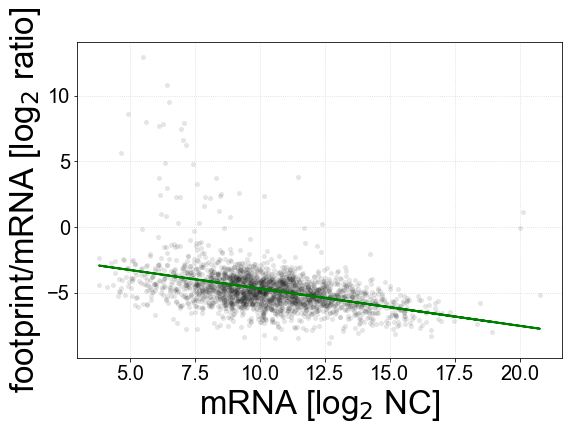

In [10]:
matplotlib.pyplot.figure(None,(8,6))

matplotlib.pyplot.plot(setx,sety,'o',color='black',alpha=0.1,ms=5,mew=0)
matplotlib.pyplot.plot(hollowx,hollowy,'o',alpha=0.1,mew=0,color='tan')

matplotlib.pyplot.xlabel('mRNA [log$_{2}$ NC]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')
matplotlib.pyplot.plot(setx,expected,'-',lw=2,color='green')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

## 3.2. regression blocks

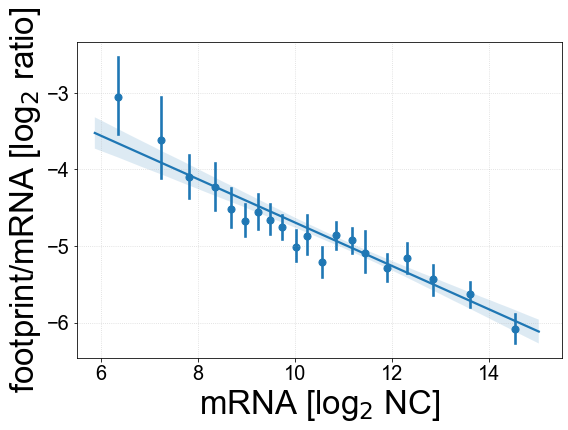

In [13]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=setx,y=sety,x_bins=20)

matplotlib.pyplot.xlim([5.5,15.5])
matplotlib.pyplot.xlabel('mRNA [log$_{2}$ NC]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()